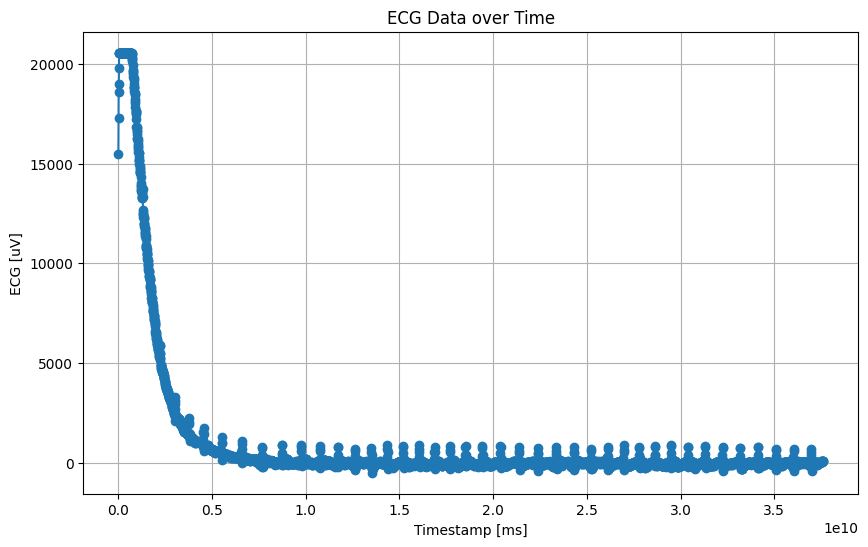

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from text file
data = pd.read_csv("./polar3/Polar_H10_83A00120_20240425_222850_ECG.txt", delimiter=";")

# Convert timestamp columns to datetime objects
data['Phone timestamp'] = pd.to_datetime(data['Phone timestamp'])
data['sensor timestamp [ns]'] = pd.to_datetime(data['sensor timestamp [ns]'], unit='ns')
data['timestamp [ms]'] = pd.to_timedelta(data['timestamp [ms]'], unit='ms')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp [ms]'], data['ecg [uV]'], marker='o', linestyle='-')
plt.title('ECG Data over Time')
plt.xlabel('Timestamp [ms]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()


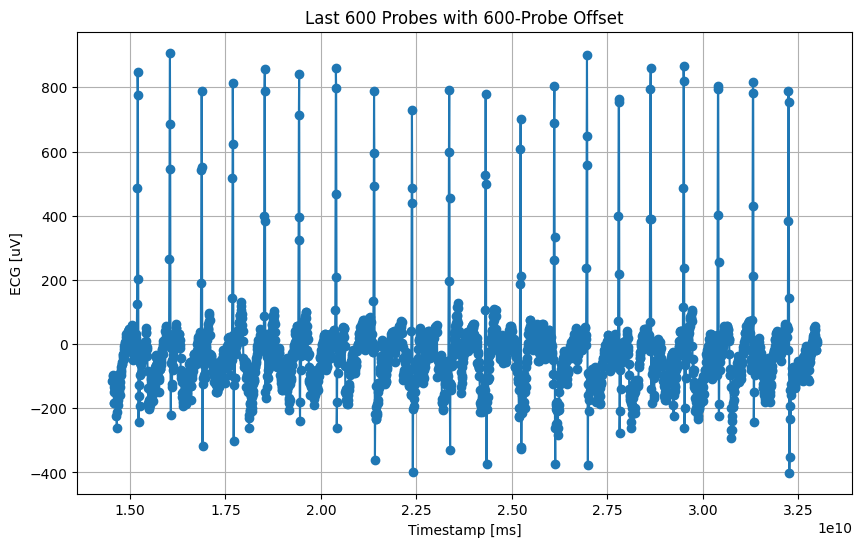

In [2]:
# Get the last 600 probes with a 600-probe offset
offset = 600
last_probe_index = data.index[-1]
start_index = max(last_probe_index - offset - 2399, 0)
last_600_probes_with_offset = data.iloc[start_index:last_probe_index - offset + 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(last_600_probes_with_offset['timestamp [ms]'], last_600_probes_with_offset['ecg [uV]'], marker='o', linestyle='-')
plt.title('Last 600 Probes with 600-Probe Offset')
plt.xlabel('Timestamp [ms]')
plt.ylabel('ECG [uV]')
plt.grid(True)
plt.show()

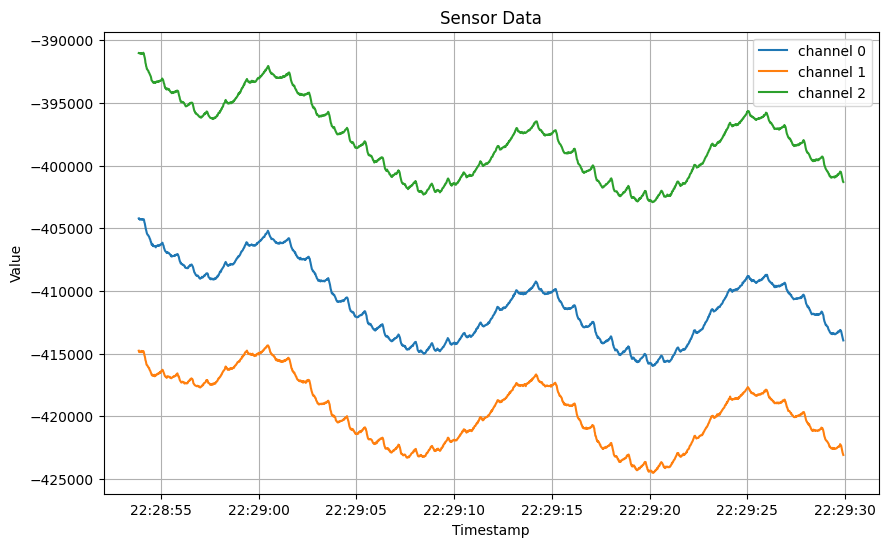

In [3]:
from datetime import datetime

# Read data from the text file
file_path = "polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt"  # Replace with the path to your text file
timestamps = []
channel_data = {'channel 0': [], 'channel 1': [], 'channel 2': []}
# channel_data = {'channel 0': [], 'channel 1': []}

with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        parts = line.strip().split(';')
        timestamps.append(datetime.fromisoformat(parts[0]))
        for i, channel in enumerate(['channel 0', 'channel 1', 'channel 2']):
        # for i, channel in enumerate(['channel 0', 'channel 1']):
            channel_data[channel].append(int(parts[i + 2]))

# Plot the data
plt.figure(figsize=(10, 6))

for channel, data in channel_data.items():
    plt.plot(timestamps, data, label=channel)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor Data')
plt.legend()
plt.grid(True)
plt.show()

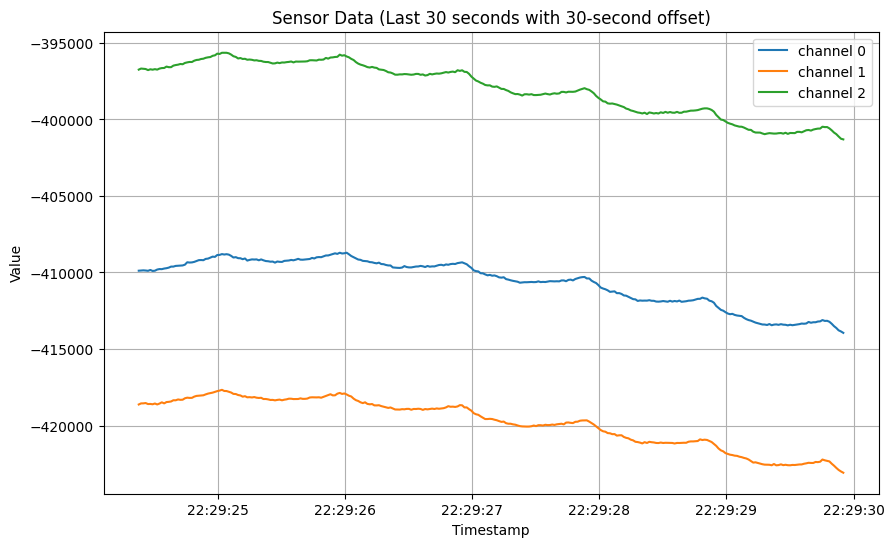

In [4]:
from datetime import timedelta
# Calculate the start and end timestamps for the last 30 seconds
end_time = timestamps[-1]
start_time = end_time - timedelta(seconds=5)

# Find the index of the first timestamp within the last 30 seconds
start_index = None
for i, ts in enumerate(timestamps):
    if ts >= start_time:
        start_index = i
        break

# Adjust the start index by adding a 30-second offset
if start_index is not None:
    start_index = max(0, start_index - 30)

# Plot the data for the last 30 seconds with 30-second offset
plt.figure(figsize=(10, 6))

for channel, data in channel_data.items():
    plt.plot(timestamps[start_index:], data[start_index:], label=channel)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor Data (Last 30 seconds with 30-second offset)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import pandas as pd

def load_txt_file(file_path):
    # Read the text file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Remove trailing semicolons and split each line into data fields
    cleaned_data = []
    for line in lines[1:]:  # Skip the header line
        if line.strip():  # Skip empty lines
            fields = line.strip().rstrip(';').split(';')
            cleaned_data.append(fields)
    
    # Create DataFrame from cleaned data
    column_names = lines[0].strip().split(';')  # Extract column names from header
    df = pd.DataFrame(cleaned_data, columns=column_names)
    
    # Convert 'Phone timestamp' column to datetime format
    df['Phone timestamp'] = pd.to_datetime(df['Phone timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    
    return df

# Specify the path to your text file
file_path = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG.txt'

# Load the text file and create a DataFrame
try:
    df = load_txt_file(file_path)
    print(df.head())
except Exception as e:
    print(f"Error loading and processing the text file: {e}")

          Phone timestamp sensor timestamp [ns] channel 0 channel 1 channel 2  \
0 2024-04-25 22:28:53.859    537278335152141644   -404209   -414768   -391018   
1 2024-04-25 22:28:53.877    537278335170298963   -404194   -414865   -391024   
2 2024-04-25 22:28:53.895    537278335188456282   -404275   -414862   -391039   
3 2024-04-25 22:28:53.931    537278335224770920   -404266   -414879   -391012   
4 2024-04-25 22:28:53.913    537278335206613601   -404301   -414880   -391033   

   ambient  
0  -530272  
1  -530278  
2  -530319  
3  -530326  
4  -530314  
